# Attempt at deep learning

the following code was an attempt at implementing the deep learning model BERT to the dataset. However due to memory restrictions on Colab, no valid results were attainned and where thus not further explored

In [ ]:
# Install the simpletransformers library (restart your runtime after the installation, make sure that GPU is activated in 'Change runtime time')
!pip install simpletransformers==0.60.9 
# documentation: simpletransformers.ai (wrapper for the huggingface transformers library (huggingface.co) on PyTorch)

In [1]:
pip install torch torchvision torchaudio

     |████████████████████████████████| 1.9MB 18.7MB/s 


In [8]:
# Import libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import classification_report
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import matplotlib.pyplot as plt 
import seaborn as sn 
import transformers as ppb # pytorch transformers

In [3]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
train_path = '/content/drive/MyDrive/NLP Shared task/toefl11_trainingdata_features'
test_path = '/content/drive/MyDrive/NLP Shared task/Featured_Data/test_features.csv'

train = pd.read_csv(train_path, sep=',')
test = pd.read_csv(test_path, sep=',')

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_dev, y_train, y_dev = train_test_split(train['text'], train['Language'], test_size = 0.1, random_state = 11)

In [28]:
df_train = {'Text': x_train,'Language': y_train}
df_train = pd.DataFrame(df_train)
#df_train = df_train.set_index('Text')
df_train

,Text,Language
2801,I agree with the following statement that the ...,ZHO
9674,"Life has various stages, each stage has there...",HIN
10836,Nowadays life is tough and expensive and young...,ARA
7349,"Well, I have several reasons to believe that ...",SPA
7581,It is natural that a student studying harder c...,KOR
...,...,...
4023,If we happen to consider this issue from an ac...,TUR
7259,\tI certainly thinks that having a broad range...,KOR
5200,I disagree that the many academic subjects to ...,SPA
3775,I think that understanding a concept about a s...,ITA


In [29]:
d = {'text': x_dev,'Language': y_dev}
df_dev = pd.DataFrame(d)
#df_dev = df_dev.set_index('Text')
df_dev

,text,Language
4293,\tSpecializing in one specific subject is bett...,TUR
5742,I agree with the statement. In my opinion it i...,DEU
5630,as far as i concerned i agree with the stateme...,TEL
6880,"\tNowadays, people argue that young people en...",TUR
5347,I will agree with the given statement which is...,TEL
...,...,...
1059,in this case i could agree because when someon...,SPA
1702,"Nowadays, we can see a lot of cars in all stre...",FRA
6723,Everyday in our lives we can see products' adv...,ITA
677,"To me, the whole point of advertising is to se...",SPA


### Building the model


In [ ]:
# Install the simpletransformers library (restart your runtime after the installation, make sure that GPU is activated in 'Change runtime time')
!pip install simpletransformers==0.60.9 # documentation: simpletransformers.ai (wrapper for the huggingface transformers library (huggingface.co) on PyTorch)


ERROR: Invalid requirement: '#'


In [ ]:
pip install torch torchvision torchaudio

     |████████████████████████████████| 1.9MB 7.6MB/s 


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import classification_report
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import matplotlib.pyplot as plt 
import seaborn as sn 

In [ ]:
# Model configuration # https://simpletransformers.ai/docs/usage/#configuring-a-simple-transformers-model 
model_args = ClassificationArgs()

model_args.overwrite_output_dir=True # overwrite existing saved models in the same directory
model_args.labels_list=['KOR','DEU','TUR','ZHO','TEL','ARA','SPA','HIN','JPN','FRA','ITA']
model_args.evaluate_during_training=True # to perform evaluation while training the model (eval data should be passed to the training method)

model_args.num_train_epochs=1
model_args.train_batch_size=128
model_args.learning_rate=1e-5 
model_args.max_seq_length=256

# Early stopping to combat overfitting: https://simpletransformers.ai/docs/tips-and-tricks/#using-early-stopping
model_args.use_early_stopping=True
model_args.early_stopping_delta=0.01 # "The improvement over best_eval_loss necessary to count as a better checkpoint"
model_args.early_stopping_metric='eval_loss'
model_args.early_stopping_metric_minimize=True 
model_args.early_stopping_patience= 3 
model_args.evaluate_during_training_steps= 32 # how often you want to run validation in terms of training steps (or batches)

model_args.evaluate_during_training_silent=False
model_args.evaluate_each_epoch=False
model_args.manual_seed = 11

# With this configuration, the training will terminate if the eval_loss on the evaluation data does not improve upon the best eval_loss by at least 0.01 for 2 consecutive evaluations. 
# An evaluation will occur once for every 34 training steps.

In [ ]:
# Checking steps per epoch
steps_per_epoch = int(np.ceil(len(train) / float(model_args.train_batch_size)))
print('Each epoch will have {:,} steps.'.format(steps_per_epoch)) # 34 steps = validating 2 times per epoch

Each epoch will have 86 steps.


In [ ]:
model = ClassificationModel('bert', 'bert-base-cased', num_labels=11, args=model_args, use_cuda=True)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
print(str(model.args).replace(',', '\n'))

ClassificationArgs(adam_epsilon=1e-08
 best_model_dir='outputs/best_model'
 cache_dir='cache_dir/'
 config={}
 cosine_schedule_num_cycles=0.5
 custom_layer_parameters=[]
 custom_parameter_groups=[]
 dataloader_num_workers=0
 do_lower_case=False
 dynamic_quantize=False
 early_stopping_consider_epochs=False
 early_stopping_delta=0.01
 early_stopping_metric='eval_loss'
 early_stopping_metric_minimize=True
 early_stopping_patience=3
 encoding=None
 adafactor_eps=(1e-30
 0.001)
 adafactor_clip_threshold=1.0
 adafactor_decay_rate=-0.8
 adafactor_beta1=None
 adafactor_scale_parameter=True
 adafactor_relative_step=True
 adafactor_warmup_init=True
 eval_batch_size=8
 evaluate_during_training=True
 evaluate_during_training_silent=False
 evaluate_during_training_steps=32
 evaluate_during_training_verbose=False
 evaluate_each_epoch=False
 fp16=True
 gradient_accumulation_steps=1
 learning_rate=1e-05
 local_rank=-1
 logging_steps=50
 manual_seed=11
 max_grad_norm=1.0
 max_seq_length=256
 model_name

Training the model

In [ ]:
# Train the model (takes a while)

_, history = model.train_model(df_train, eval_df=df_dev)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:446: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/78 [00:00<?, ?it/s]

RuntimeError: ignored

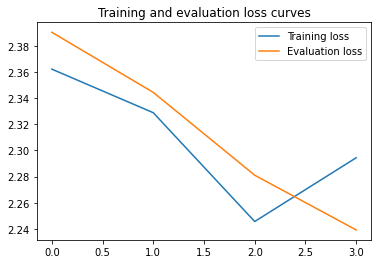

In [ ]:
# Training and evaluation loss curves

train_loss = history['train_loss']
eval_loss = history['eval_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(eval_loss, label='Evaluation loss')
plt.title('Training and evaluation loss curves')
plt.legend()
plt.show()

In [ ]:
history

{'eval_loss': [2.3903156691703242,
  2.3443494603253794,
  2.2810257345006084,
  2.2391852321832078],
 'global_step': [32, 64, 96, 128],
 'mcc': [0.03781722625612027,
  0.11496136599791024,
  0.14105841031443256,
  0.16067633980836407],
 'train_loss': [2.362105369567871,
  2.328800916671753,
  2.2456142902374268,
  2.294342041015625]}

Predictions on test data

In [ ]:
# Make predictions with the model 

predicted, probabilities = model.predict(df_dev['text'].to_list())
df_dev['predicted'] = predicted

  0%|          | 0/138 [00:00<?, ?it/s]

In [ ]:
df_dev.head(3)

,text,Language,predicted
4293,\tSpecializing in one specific subject is bett...,TUR,TEL
5742,I agree with the statement. In my opinion it i...,DEU,ITA
5630,as far as i concerned i agree with the stateme...,TEL,TEL


In [ ]:
# Result (note: your result can be different due to randomness in operations)

print(classification_report(df_dev['Language'], df_dev['predicted']))

              precision    recall  f1-score   support

         ARA       0.30      0.23      0.26        93
         DEU       0.17      0.03      0.05       102
         FRA       0.13      0.14      0.14        99
         HIN       0.29      0.09      0.14       102
         ITA       0.18      0.65      0.28        89
         JPN       0.28      0.32      0.30        98
         KOR       0.23      0.30      0.26       103
         SPA       0.13      0.02      0.04        86
         TEL       0.29      0.78      0.42       104
         TUR       0.50      0.02      0.03       118
         ZHO       0.00      0.00      0.00       106

    accuracy                           0.23      1100
   macro avg       0.23      0.23      0.17      1100
weighted avg       0.23      0.23      0.17      1100



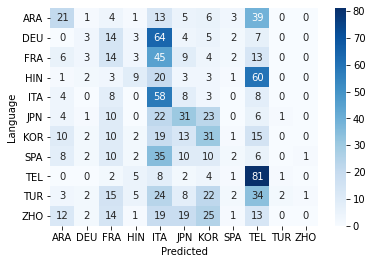

In [ ]:
# Plot the confusion matrix

confusion_matrix = pd.crosstab(df_dev['Language'], df_dev['predicted'], rownames=['Language'], colnames=['Predicted']) 
sn.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.show()